In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bike_data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

In [3]:
bike_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
temp = bike_data[['Temperature(°C)', 'Humidity(%)', 'Rented Bike Count']]
count = temp[temp['Rented Bike Count'] > 0].groupby('Humidity(%)').count()
count = count.reset_index()
count

,Humidity(%),Temperature(°C),Rented Bike Count
0,0,17,17
1,10,1,1
2,11,1,1
3,12,1,1
4,13,3,3
...,...,...,...
85,94,53,53
86,95,68,68
87,96,109,109
88,97,173,173


In [5]:
final = count.pivot(index = 'Temperature(°C)', columns= 'Humidity(%)', values= 'Rented Bike Count')
final

Humidity(%),0,10,11,12,13,14,15,16,17,18,...,89,90,91,92,93,94,95,96,97,98
Temperature(°C),,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number of Bikes')

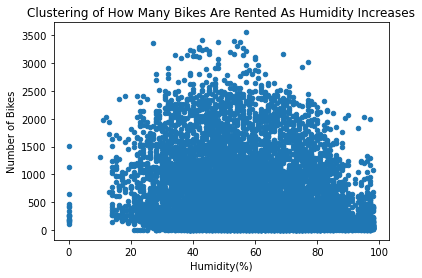

In [6]:
bike_data.plot.scatter(x = 'Humidity(%)', y = 'Rented Bike Count')
plt.title("Clustering of How Many Bikes Are Rented As Humidity Increases")
plt.ylabel('Number of Bikes')

The above dataset shows how many bikes are rented given a certain Humidity percentage. The most visible thing to notice is
that most bikes are rented when the humidity is in the 20-80% humidity range. One inaccuracy is the fact the data is so dense, it is not easy to tell exactly how many data points lie where, but the visible trend says enough to the observer to show the above statement holds true.

Since Car data is not given through this data set, One possible inference is comparisson of how dense traffic is throughout the year to how many bikes are rented. From this, we could make a line chart to show car traffic incline and decline with Bike traffic incline and decline.

Using the given data, one extra feature would be to look at the rented bike count, see what time of the year it is, and when the rented count spikes, check for a holiday or week that may influence less drivers on the streets. For example: In Seoul there may be a parade or a special event prohibiting drivers thus increasing bike rentals.